In [17]:
!unzip worldhappiness.zip

Archive:  worldhappiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [152]:
import pandas as pd

happiness = pd.read_csv('2019.csv')

happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [153]:
happiness.columns = happiness.columns.str.strip()

In [154]:
print(happiness.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [155]:
happiness.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [156]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Score', 'GDP per capita', 'Social support','Freedom to make life choices',
                     'Generosity', 'Perceptions of corruption']
scaler = MinMaxScaler()

happiness[numerical_columns] = scaler.fit_transform(happiness[numerical_columns])

print(happiness)

     Overall rank         Country or region     Score  GDP per capita  \
0               1                   Finland  1.000000        0.795724   
1               2                   Denmark  0.965622        0.821259   
2               3                    Norway  0.956265        0.883610   
3               4                   Iceland  0.944060        0.819477   
4               5               Netherlands  0.942840        0.828979   
..            ...                       ...       ...             ...   
151           152                    Rwanda  0.097844        0.213183   
152           153                  Tanzania  0.076892        0.282660   
153           154               Afghanistan  0.071196        0.207838   
154           155  Central African Republic  0.046786        0.015439   
155           156               South Sudan  0.000000        0.181710   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0          0.977217                    0.986 

In [157]:
min_health = happiness["Healthy life expectancy"].min()
max_health = happiness["Healthy life expectancy"].max()
happiness["Healthy life expectancy_Normalized"] = ((happiness["Healthy life expectancy"] - min_health) / (max_health - min_health)) * 100
print(happiness['Healthy life expectancy_Normalized'])

0      86.415425
1      87.291849
2      90.096407
3      89.921122
4      87.554777
         ...    
151    53.812445
152    43.733567
153    31.638913
154     9.202454
155    25.854514
Name: Healthy life expectancy_Normalized, Length: 156, dtype: float64


In [158]:
print(happiness['Country or region'].unique())

['Finland' 'Denmark' 'Norway' 'Iceland' 'Netherlands' 'Switzerland'
 'Sweden' 'New Zealand' 'Canada' 'Austria' 'Australia' 'Costa Rica'
 'Israel' 'Luxembourg' 'United Kingdom' 'Ireland' 'Germany' 'Belgium'
 'United States' 'Czech Republic' 'United Arab Emirates' 'Malta' 'Mexico'
 'France' 'Taiwan' 'Chile' 'Guatemala' 'Saudi Arabia' 'Qatar' 'Spain'
 'Panama' 'Brazil' 'Uruguay' 'Singapore' 'El Salvador' 'Italy' 'Bahrain'
 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Uzbekistan' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Thailand' 'Latvia' 'South Korea' 'Estonia' 'Jamaica'
 'Mauritius' 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary'
 'Paraguay' 'Northern Cyprus' 'Peru' 'Portugal' 'Pakistan' 'Russia'
 'Philippines' 'Serbia' 'Moldova' 'Libya' 'Montenegro' 'Tajikistan'
 'Croatia' 'Hong Kong' 'Dominican Republic' 'Bosnia and Herzegovina'
 'Turkey' 'Malaysia' 'Belarus' 'Greece' 'Mongolia' 'North Macedonia'
 'Nigeria' 'Kyrgyzstan'

In [159]:
country_to_region = {
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Iceland': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'New Zealand': 'Oceania',
    'Canada': 'North America',
    'Austria': 'Europe',
    'Australia': 'Oceania',
    'Costa Rica': 'North America',
    'Israel': 'Middle East',
    'Luxembourg': 'Europe',
    'United Kingdom': 'Europe',
    'Ireland': 'Europe',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'United States': 'North America',
    'Czech Republic': 'Europe',
    'United Arab Emirates': 'Middle East',
    'Malta': 'Europe',
    'Mexico': 'North America',
    'France': 'Europe',
    'Taiwan': 'Asia',
    'Chile': 'South America',
    'Guatemala': 'North America',
    'Saudi Arabia': 'Middle East',
    'Qatar': 'Middle East',
    'Spain': 'Europe',
    'Panama': 'North America',
    'Brazil': 'South America',
    'Uruguay': 'South America',
    'Singapore': 'Asia',
    'El Salvador': 'North America',
    'Italy': 'Europe',
    'Bahrain': 'Middle East',
    'Slovakia': 'Europe',
    'Trinidad & Tobago': 'North America',
    'Poland': 'Europe',
    'Uzbekistan': 'Asia',
    'Lithuania': 'Europe',
    'Colombia': 'South America',
    'Slovenia': 'Europe',
    'Nicaragua': 'North America',
    'Kosovo': 'Europe',
    'Argentina': 'South America',
    'Romania': 'Europe',
    'Cyprus': 'Europe',
    'Ecuador': 'South America',
    'Kuwait': 'Middle East',
    'Thailand': 'Asia',
    'Latvia': 'Europe',
    'South Korea': 'Asia',
    'Estonia': 'Europe',
    'Jamaica': 'North America',
    'Mauritius': 'Africa',
    'Japan': 'Asia',
    'Honduras': 'North America',
    'Kazakhstan': 'Asia',
    'Bolivia': 'South America',
    'Hungary': 'Europe',
    'Paraguay': 'South America',
    'Northern Cyprus': 'Middle East',
    'Peru': 'South America',
    'Portugal': 'Europe',
    'Pakistan': 'Asia',
    'Russia': 'Asia',
    'Philippines': 'Asia',
    'Serbia': 'Europe',
    'Moldova': 'Europe',
    'Libya': 'Africa',
    'Montenegro': 'Europe',
    'Tajikistan': 'Asia',
    'Croatia': 'Europe',
    'Hong Kong': 'Asia',
    'Dominican Republic': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'Turkey': 'Middle East',
    'Malaysia': 'Asia',
    'Belarus': 'Europe',
    'Greece': 'Europe',
    'Mongolia': 'Asia',
    'North Macedonia': 'Europe',
    'Nigeria': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Turkmenistan': 'Asia',
    'Algeria': 'Africa',
    'Morocco': 'Africa',
    'Azerbaijan': 'Asia',
    'Lebanon': 'Middle East',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'Vietnam': 'Asia',
    'Bhutan': 'Asia',
    'Cameroon': 'Africa',
    'Bulgaria': 'Europe',
    'Ghana': 'Africa',
    'Ivory Coast': 'Africa',
    'Nepal': 'Asia',
    'Jordan': 'Middle East',
    'Benin': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Gabon': 'Africa',
    'Laos': 'Asia',
    'South Africa': 'Africa',
    'Albania': 'Europe',
    'Venezuela': 'South America',
    'Cambodia': 'Asia',
    'Palestinian Territories': 'Middle East',
    'Senegal': 'Africa',
    'Somalia': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Burkina Faso': 'Africa',
    'Armenia': 'Asia',
    'Iran': 'Middle East',
    'Guinea': 'Africa',
    'Georgia': 'Asia',
    'Gambia': 'Africa',
    'Kenya': 'Africa',
    'Mauritania': 'Africa',
    'Mozambique': 'Africa',
    'Tunisia': 'Africa',
    'Bangladesh': 'Asia',
    'Iraq': 'Middle East',
    'Congo (Kinshasa)': 'Africa',
    'Mali': 'Africa',
    'Sierra Leone': 'Africa',
    'Sri Lanka': 'Asia',
    'Myanmar': 'Asia',
    'Chad': 'Africa',
    'Ukraine': 'Europe',
    'Ethiopia': 'Africa',
    'Swaziland': 'Africa',
    'Uganda': 'Africa',
    'Egypt': 'Africa',
    'Zambia': 'Africa',
    'Togo': 'Africa',
    'India': 'Asia',
    'Liberia': 'Africa',
    'Comoros': 'Africa',
    'Madagascar': 'Africa',
    'Lesotho': 'Africa',
    'Burundi': 'Africa',
    'Zimbabwe': 'Africa',
    'Haiti': 'North America',
    'Botswana': 'Africa',
    'Syria': 'Middle East',
    'Malawi': 'Africa',
    'Yemen': 'Middle East',
    'Rwanda': 'Africa',
    'Tanzania': 'Africa',
    'Afghanistan': 'Asia',
    'Central African Republic': 'Africa',
    'South Sudan': 'Africa'
}

happiness['Region'] = happiness['Country or region'].map(country_to_region)

print(happiness[['Country or region', 'Region']].head())

  Country or region  Region
0           Finland  Europe
1           Denmark  Europe
2            Norway  Europe
3           Iceland  Europe
4       Netherlands  Europe


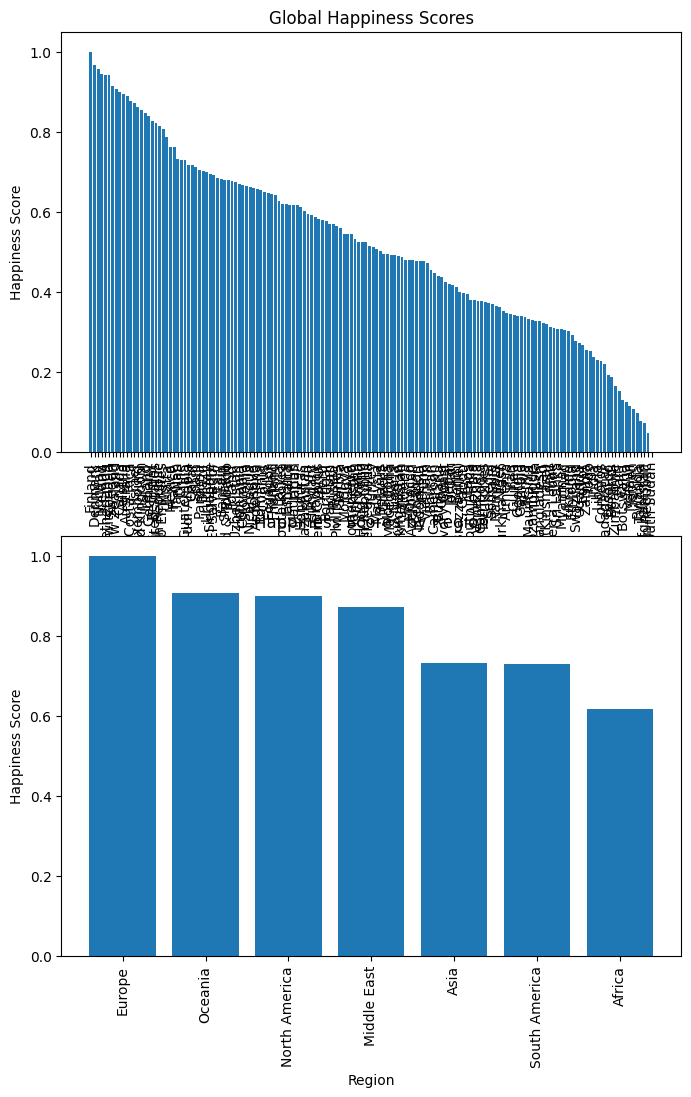

In [160]:
# Global Happiness Scores: Create a bar chart of happiness scores across countries.
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(8, 12))

# subplot 1 for all countries
ax1.bar(happiness['Country or region'], happiness['Score'])
ax1.set_xlabel('Country')
ax1.set_ylabel('Happiness Score')
ax1.set_title('Global Happiness Scores')
ax1.tick_params(axis='x', rotation=90)
# subplot 2 for regions
ax2.bar(happiness['Region'], happiness['Score'])
ax2.set_xlabel('Region')
ax2.set_ylabel('Happiness Score')
ax2.set_title('Happiness Scores by Region')
ax2.tick_params(axis='x', rotation=90)

plt.show()

Happiness ысщкуы in Asia, South America and Africa are significantly lower. At the same time, European countries have the maximum average value of this indicator, which indicates a prosperous economy, politics and standard of living in these countries

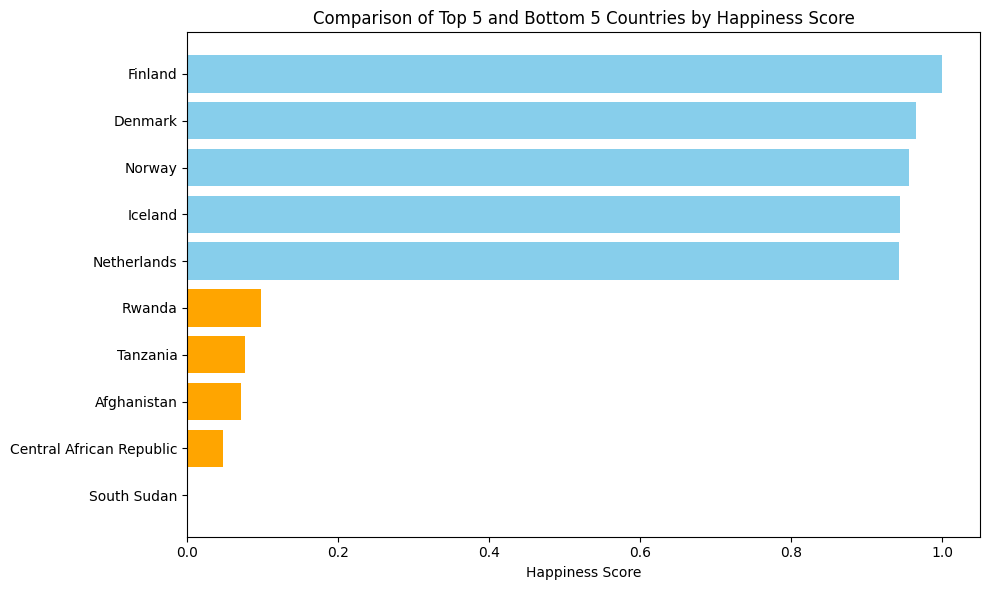

In [161]:
import matplotlib.pyplot as plt
# creating top 5 and bottom 5 for comparsion
happiness_sorted = happiness.sort_values(by='Score', ascending=False) #sorting score list
top_5 = happiness_sorted.head(5)
bottom_5 = happiness_sorted.tail(5)

combined = pd.concat([top_5, bottom_5])
plt.figure(figsize=(10, 6))
plt.barh(combined['Country or region'], combined['Score'], color=['skyblue']*5 + ['orange']*5)
plt.xlabel('Happiness Score')
plt.title('Comparison of Top 5 and Bottom 5 Countries by Happiness Score')

plt.gca().invert_yaxis() # Inverting y-axis to have the top 5 at the top

plt.tight_layout()
plt.show() # poor unhappy South Sudan

The top 5 positions are occupied by European countries with stable economies, without political scandals, wars, corruption, and the opposite position in the countries in the last lines

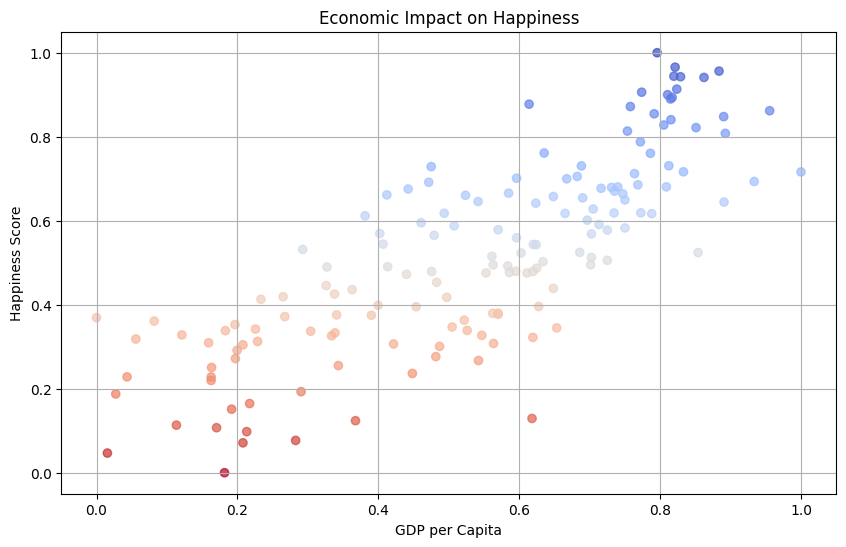

In [162]:
# Economic Impact on Happiness: Use a scatter plot to explore the relationship between GDP per capita and happiness scores.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(happiness['GDP per capita'], happiness['Score'],
                      c=happiness['Score'], cmap='coolwarm_r', alpha=0.7) # adding color for dots
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Economic Impact on Happiness')
plt.grid(True) # adding simple grid
plt.show()

the higher the GDP per capita, the higher the level of happiness of the population. However, there are countries in which, despite a high level of happiness, the economy is at an average or lower level, which suggests that the level of happiness in these countries is determined by other parameters. And on the other hand, there are countries with strong economies, but having other problems within the country that cause a decrease in the level of happiness among the population

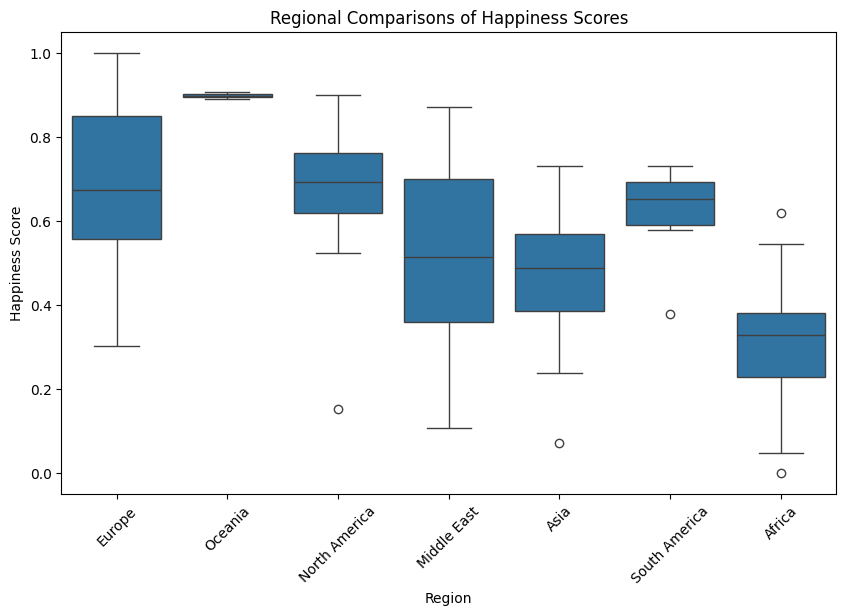

In [163]:
# Regional Comparisons: Generate boxplots to compare happiness scores across regions.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Score', data=happiness)
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Regional Comparisons of Happiness Scores')
plt.xticks(rotation=45)
plt.show()

Despite outliers, happiness levels in South American countries are high. The spread of the indicator in the Middle East suggests that there are countries there with both unusually high and extremely low levels of happiness. We can see the highest average in Europe, North America and South America. lowest, despite outliers, in Africa

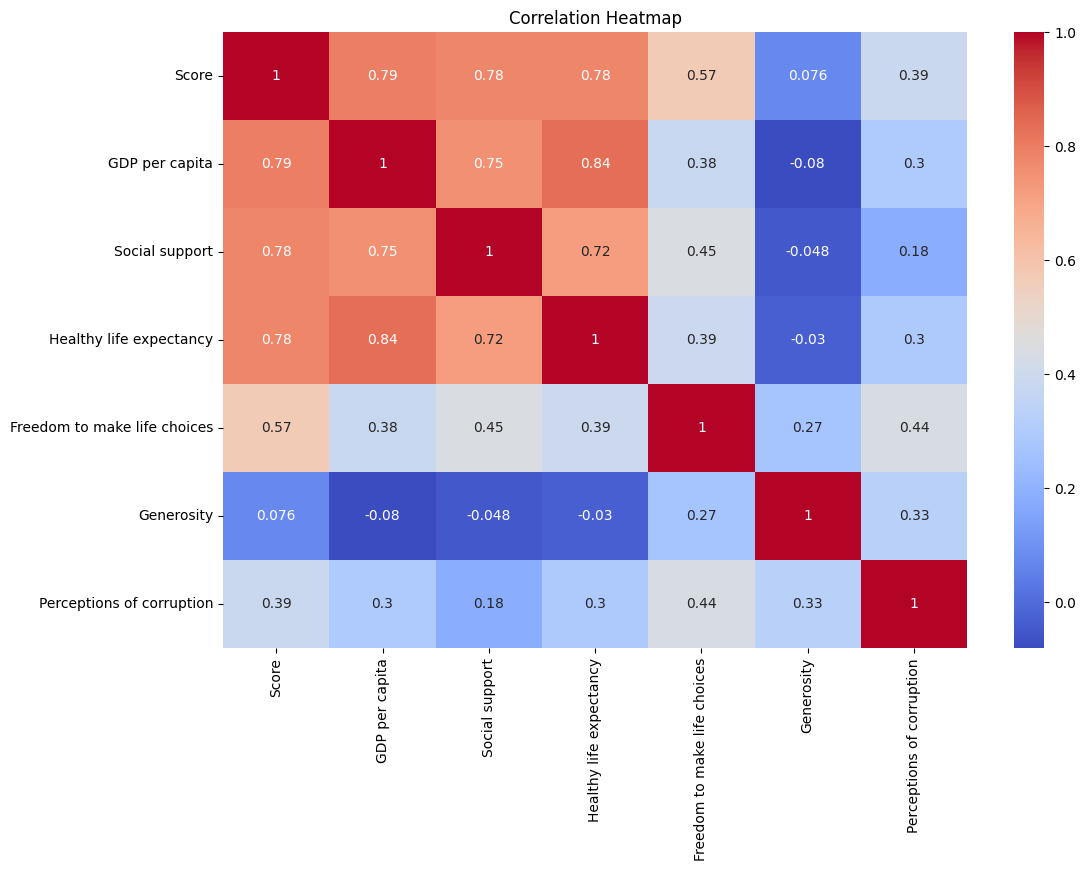

In [164]:
# Correlation Heatmap: Visualize the correlation between different factors using a heatmap.
import matplotlib.pyplot as plt
import seaborn as sns

matrix = happiness[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3 indicators with the highest correlation between each other - GDP per capita, Social support, Healthy life expectancy.

In [165]:
# Interactive World Map: Create an interactive map displaying happiness scores across different countries.
import plotly.express as px
import plotly.graph_objects as go

# Selecting relevant columns for plotting
happiness_map = happiness[['Score', 'Country or region','GDP per capita']]

# Creating a map
fig = px.choropleth(happiness_map,
                     locations='Country or region',
                     locationmode='country names',
                     color='Score',
                     color_continuous_scale='RdBu',
                     title='Happiness score (Countries)',
                     labels={"Score": "Happiness Score"}
                     )

fig.show()

on the map you can see countries and regions with a low level of happiness, located close to each other quite closely, which indicates the influence of politics in these countries, their relationships, on the level of economic development and the level of happiness in these countries.

In [166]:
# Dynamic Scatter Plot: Plot an interactive scatter plot exploring relationships between various factors like health, freedom, and happiness.
import plotly.express as px

# Selecting relevant columns for plotting
happiness_scatter = happiness[['Healthy life expectancy', 'Freedom to make life choices', 'Score']]

# Creating a scatter plot
fig = px.scatter(happiness_scatter,
                 x='Healthy life expectancy',
                 y='Freedom to make life choices',
                 color='Score',
                 color_continuous_scale='RdBu',
                 title='Relationship between Health, Freedom, and Happiness',
                 labels={"Healthy life expectancy": "Healthy Life Expectancy", "Freedom to make life choices": "Freedom"}
                 )

fig.show()

freedom of choice depends on GDP per capita, and the higher this indicator, the more people feel confident in the future and it is easierfor them to make various decisions, which in turn affects life expectancy. We see that all indicators are connected and influence each other. Countries with high levels of happiness have more freedom and a higher life expectancy

In [167]:
# Factor Analysis: Use a bubble chart to visualize the impact of social support and generosity on happiness scores, with bubble size representing country population.
import plotly.express as px

# Selecting relevant columns for plotting
happiness_bubble = happiness[['Social support', 'Generosity', 'Score', 'GDP per capita']]

# Creating a bubble chart
fig = px.scatter(happiness_bubble,
                 x='Social support',
                 y='Generosity',
                 size='GDP per capita',
                 color='Score',
                 color_continuous_scale='RdBu',
                 title='Impact of Social Support, Generosity, and GDP per capita on Happiness',
                 labels={"Social support": "Social Support", "Generosity": "Generosity"}
                 )

fig.show()

here we also see the impact of government support on happiness levels. The more social assistance and the better the economy, the higher the level of happiness. It can be noted that with a help indicator of 0.7 and generosity of 0.3, the average level of happiness reaches an indicator of 0.6 and higher. And if at least one of the indicators decreases, the level of happiness falls

In [173]:
# Perform a multi-variable analysis and visualize it using an interactive Plotly chart.
import plotly.express as px
import pandas as pd
# Creating categories for happiness score
happiness['Score_Category'] = pd.cut(happiness['Score'],
                               bins=[0,0.2,0.5,0.7,0.8,1],
                               labels=['Very Small', 'Small', 'Medium', 'High', 'Very High'],
                               include_lowest=True)

# Creating the stacked bar chart
fig = px.bar(
    happiness,
    x='Score_Category',
    color='Region',
    title='Distribution of Countries by Happiness Score',
    labels={'Score_Category': 'Happiness Score Category', 'count': 'Number of Countries'},
    barmode='stack',
    text_auto=True
)

fig.show()

here we can observe that there are European countries with low levels of happiness and Asian and African countries with high ones. most likely these are outliers. You can also note that most countries are in the medium and low range, which indicates a global trend towards a decrease in the level of happiness

In [174]:
# Explore time-series aspects if temporal data is available, or compare with another year’s dataset.
import pandas as pd

happiness18 = pd.read_csv('2018.csv')

happiness18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [175]:
happiness18.rename(columns={
    "Score": "Score18",
    "GDP per capita": "GDP per capita18",
    "Social support": "Social support18",
    "Healthy life expectancy": "Healthy life expectancy18",
    "Freedom to make life choices": "Freedom to make life choices18",
    "Generosity": "Generosity18",
    "Perceptions of corruption": "Perceptions of corruption18"
}, inplace=True)

In [177]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Score18', 'GDP per capita18', 'Social support18','Freedom to make life choices18',
                     'Generosity18', 'Perceptions of corruption18']
scaler = MinMaxScaler()

happiness18[numerical_columns] = scaler.fit_transform(happiness18[numerical_columns])

print(happiness18)

     Overall rank         Country or region   Score18  GDP per capita18  \
0               1                   Finland  1.000000          0.622615   
1               2                    Norway  0.991961          0.694656   
2               3                   Denmark  0.983711          0.644561   
3               4                   Iceland  0.971018          0.640744   
4               5               Switzerland  0.969325          0.677481   
..            ...                       ...       ...               ...   
151           152                     Yemen  0.095198          0.210878   
152           153                  Tanzania  0.084197          0.217080   
153           154               South Sudan  0.073831          0.160782   
154           155  Central African Republic  0.037656          0.011450   
155           156                   Burundi  0.000000          0.043416   

     Social support18  Healthy life expectancy18  \
0            0.968370                      0.87

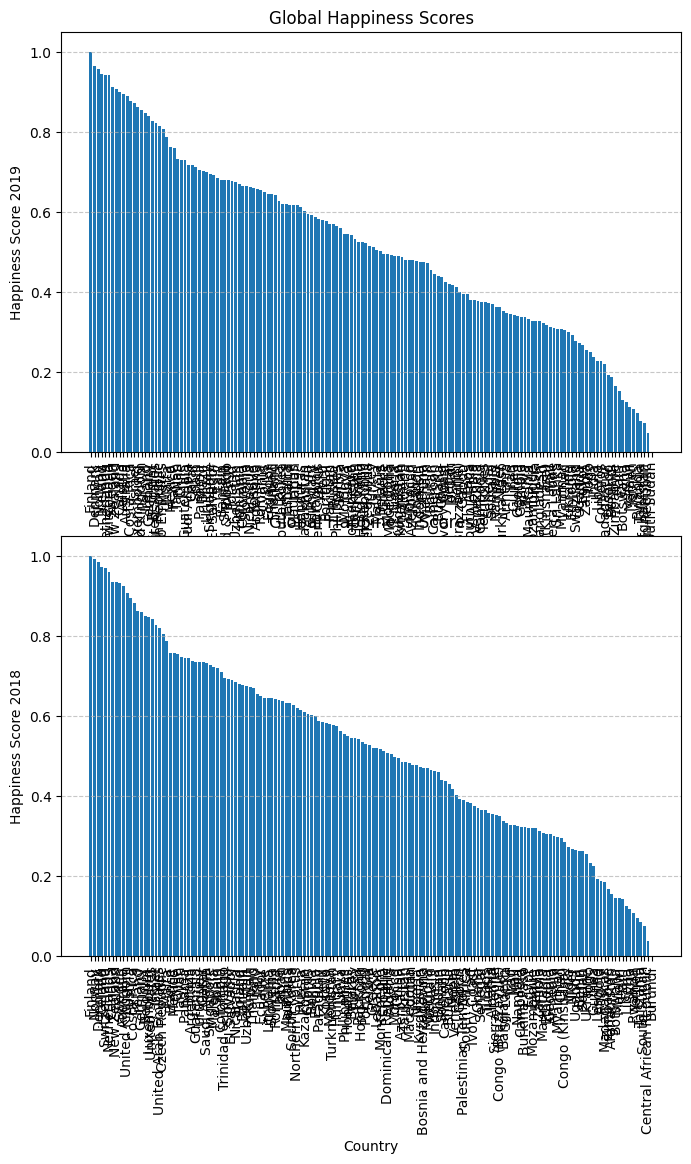

In [180]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(8, 12))

# subplot 1 for 2019
ax1.bar(happiness['Country or region'], happiness['Score'])
ax1.set_xlabel('Country')
ax1.set_ylabel('Happiness Score 2019')
ax1.set_title('Global Happiness Scores')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90)
# subplot 2 for 2018
ax2.bar(happiness18['Country or region'], happiness18['Score18'])
ax2.set_xlabel('Country')
ax2.set_ylabel('Happiness Score 2018')
ax2.set_title('Global Happiness Scores')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=90)

plt.show()

We can continue the thought of the previous plots and see in the comparative graph that some countries have decreased their happiness level over the year. this is visible both among countries with a high value and among countries with a low value, which indicates a general decline in this indicator around the world

Also, in my opinion, the level of corruption has a weak direct impact on other indicators, including the level of happiness. However, most likely, the strength of influence of this indicator varies in different countries, as it is related to the economic level and generosity. The higher the corruption indicator in countries with weak economies, the more strongly this indicator affects other indicators, including the level of happiness